In [1]:
import glob
import os
import matplotlib.pyplot as plt
import palettable.colorbrewer.diverging as pld
import numpy as np
import pandas as pd

In [2]:
%matplotlib widget

In [3]:
plt.close('all')

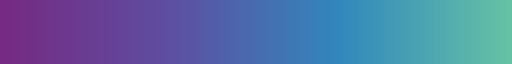

In [4]:
from matplotlib.colors import LinearSegmentedColormap

colors = [
    # (0.25098039215686274, 0.0, 0.29411764705882354), 
    (0.4627450980392157, 0.16470588235294117, 0.5137254901960784),
    (0.3686274509803922, 0.30980392156862746, 0.6352941176470588), 
    (0.19607843137254902, 0.5333333333333333, 0.7411764705882353), 
    (0.4, 0.7607843137254902, 0.6470588235294118),
 # (0.6705882352941176, 0.8666666666666667, 0.6431372549019608),
 # (0.6509803921568628, 0.8509803921568627, 0.41568627450980394),
 # (0.10196078431372549, 0.5882352941176471, 0.2549019607843137), 
         ]

BlGn = LinearSegmentedColormap.from_list('BlGn', colors, N=100)
BlGn

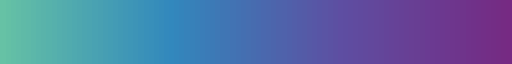

In [5]:
BlGn_r = LinearSegmentedColormap.from_list('BlGn_r', list(reversed(colors)), N=100)
BlGn_r

In [6]:
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


# Find the subfolders in the current working folder (cwd)

In [7]:
# cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd01 = '/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl'
subfolder01 = glob.glob(cwd01 + '/**fluorescence**')
subfolder01.sort()
# # del subfolder[-1]
print(*subfolder01, sep = '\n')  ## Print one element per line

/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240913225834_285d6264_fluorescence
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240913232855_e22dc67e_fluorescence
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240913235652_b42a3ca6_fluorescence
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914014420_b857c5a0_fluorescence
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914021112_428cc341_fluorescence
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914024023_dbd2f7b6_fluorescence
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914030902_b61aced3_fluorescence
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914033640_786366d4_fluorescence
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914040349_66f09641_fluorescence
/Volumes/CHL_SBU/LD

In [8]:
len(subfolder01)

39

In [9]:
# cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd02 = '/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl'
subfolder02 = glob.glob(cwd02 + '/**absorbance**')
subfolder02.sort()
# # del subfolder[-1]
print(*subfolder02, sep = '\n')  ## Print one element per line

/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240913225834_285d6264_absorbance
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240913232855_e22dc67e_absorbance
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240913235652_b42a3ca6_absorbance
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914014420_b857c5a0_absorbance
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914021112_428cc341_absorbance
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914024023_dbd2f7b6_absorbance
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914030902_b61aced3_absorbance
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914033640_786366d4_absorbance
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914040349_66f09641_absorbance
/Volumes/CHL_SBU/LDRD_MAC_168223/2024

In [10]:
len(subfolder02)

39

# Read PL data into pandas dataframe

In [11]:
df01 = pd.DataFrame()

for i in range(len(subfolder01)):
# for i in range(len(dilute_list)):
    data_files = glob.glob(subfolder01[i] + '/**.csv')
    data_files.sort()
    
    # if 'fitted' in data_files[-1]:
    #     del data_files[-1]
    
    # suffix = os.path.basename(subfolder[i])
    # suffix = os.path.basename(data_files[0])[:28]
    suffix = f'{i:02d}_' + os.path.basename(data_files[0])[:28]
    print(f'{i = }, {suffix = }')
    # suffix = dilute_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 14
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    if 'Cs' in suffix:
        if 'fitted' in data_files[-1]:
            try:
                df_int = pd.read_csv(data_files[-1], skiprows=skiprows+3, sep=',')
                df_temp = pd.concat([df_temp, df_int['Fluorescence_mean']], axis=1, ignore_index=False)
            except KeyError:
                df_int = pd.read_csv(data_files[-1], skiprows=skiprows+3-1, sep=',')
                df_temp = pd.concat([df_temp, df_int['Fluorescence_mean']], axis=1, ignore_index=False)
                
            print('Read data from **fitted.csv')
        
        else:
            for k in range(len(data_files)):        
                # df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
                # df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
                try:
                    df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
                    df_temp = pd.concat([df_temp, df_int['Fluorescence']], axis=1, ignore_index=False)
                except KeyError:
                    df_int = pd.read_csv(data_files[k], skiprows=skiprows-1, sep=',')
                    df_temp = pd.concat([df_temp, df_int['Fluorescence']], axis=1, ignore_index=False)
            print('No **fitted.csv')
        
        # print(f'{df_temp.shape = }')
        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df01[f'x_{suffix}'] = df_int['Wavelength']
        df01[f'{suffix}_mean'] = df_temp.mean(axis=1)

i = 0, suffix = '00_Cs_021_Br_064_Cl_095_OAm_000'
No **fitted.csv
i = 1, suffix = '01_Cs_025_Br_076_Cl_076_OAm_003'
Read data from **fitted.csv
i = 2, suffix = '02_Cs_031_Br_094_Cl_047_OAm_007'
Read data from **fitted.csv
i = 3, suffix = '03_Cs_036_Br_107_Cl_027_OAm_010'
Read data from **fitted.csv
i = 4, suffix = '04_Cs_039_Br_117_Cl_012_OAm_012'
Read data from **fitted.csv
i = 5, suffix = '05_Cs_021_Br_064_Cl_095_OAm_000'
Read data from **fitted.csv
i = 6, suffix = '06_Cs_025_Br_076_Cl_076_OAm_003'
Read data from **fitted.csv
i = 7, suffix = '07_Cs_031_Br_094_Cl_047_OAm_007'
Read data from **fitted.csv
i = 8, suffix = '08_Cs_036_Br_107_Cl_027_OAm_010'
Read data from **fitted.csv
i = 9, suffix = '09_Cs_039_Br_117_Cl_012_OAm_012'
Read data from **fitted.csv
i = 10, suffix = '10_Cs_021_Br_064_Cl_095_OAm_000'
Read data from **fitted.csv
i = 11, suffix = '11_Cs_025_Br_076_Cl_076_OAm_003'
Read data from **fitted.csv
i = 12, suffix = '12_Cs_031_Br_094_Cl_047_OAm_007'
Read data from **fitted

In [12]:
df01.shape

(1044, 70)

In [13]:
subfolder01[21]

'/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/20240914164221_24da497b_fluorescence'

# Read Abs data into pandas dataframe

In [14]:
df02 = pd.DataFrame()

for i in range(len(subfolder02)):
# for i in range(len(dilute_list)):
    data_files = glob.glob(subfolder02[i] + '/**.csv')
    data_files.sort()
    
    # if 'fitted' in data_files[-1]:
    #     del data_files[-1]
    
    # suffix = os.path.basename(subfolder[i])
    # suffix = os.path.basename(data_files[0])[:28]
    suffix = f'{i:02d}_' + os.path.basename(data_files[0])[:28]
    print(f'{i = }, {suffix = }')
    # suffix = dilute_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 13
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    if 'Cs' in suffix:
        if 'fitted' in data_files[-1]:
            try:
                df_int = pd.read_csv(data_files[-1], skiprows=skiprows+3, sep=',')
                df_temp = pd.concat([df_temp, df_int['Offset']], axis=1, ignore_index=False)
            except KeyError:
                df_int = pd.read_csv(data_files[-1], skiprows=skiprows+3-1, sep=',')
                df_temp = pd.concat([df_temp, df_int['Offset']], axis=1, ignore_index=False)
                
            print('Read data from **fitted.csv')
        
        else:
            for k in range(len(data_files)):        
                # df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
                # df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
                try:
                    df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
                    df_temp = pd.concat([df_temp, df_int['Offset']], axis=1, ignore_index=False)
                except KeyError:
                    df_int = pd.read_csv(data_files[k], skiprows=skiprows-1, sep=',')
                    df_temp = pd.concat([df_temp, df_int['Offset']], axis=1, ignore_index=False)
            print('No **fitted.csv')
    
        # print(f'{df_temp.shape = }')
        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df02[f'x_{suffix}'] = df_int['Wavelength']
        df02[f'{suffix}_mean'] = df_temp.mean(axis=1)

i = 0, suffix = '00_Cs_021_Br_064_Cl_095_OAm_000'
Read data from **fitted.csv
i = 1, suffix = '01_Cs_025_Br_076_Cl_076_OAm_003'
Read data from **fitted.csv
i = 2, suffix = '02_Cs_031_Br_094_Cl_047_OAm_007'
Read data from **fitted.csv
i = 3, suffix = '03_Cs_036_Br_107_Cl_027_OAm_010'
Read data from **fitted.csv
i = 4, suffix = '04_Cs_039_Br_117_Cl_012_OAm_012'
Read data from **fitted.csv
i = 5, suffix = '05_Cs_021_Br_064_Cl_095_OAm_000'
Read data from **fitted.csv
i = 6, suffix = '06_Cs_025_Br_076_Cl_076_OAm_003'
Read data from **fitted.csv
i = 7, suffix = '07_Cs_031_Br_094_Cl_047_OAm_007'
Read data from **fitted.csv
i = 8, suffix = '08_Cs_036_Br_107_Cl_027_OAm_010'
Read data from **fitted.csv
i = 9, suffix = '09_Cs_039_Br_117_Cl_012_OAm_012'
Read data from **fitted.csv
i = 10, suffix = '10_Cs_021_Br_064_Cl_095_OAm_000'
Read data from **fitted.csv
i = 11, suffix = '11_Cs_025_Br_076_Cl_076_OAm_003'
Read data from **fitted.csv
i = 12, suffix = '12_Cs_031_Br_094_Cl_047_OAm_007'
Read data f

In [15]:
df02.shape

(1044, 70)

## Check data in pd dataframe

In [16]:
df01.keys()

Index(['x_00_Cs_021_Br_064_Cl_095_OAm_000',
       '00_Cs_021_Br_064_Cl_095_OAm_000_mean',
       'x_01_Cs_025_Br_076_Cl_076_OAm_003',
       '01_Cs_025_Br_076_Cl_076_OAm_003_mean',
       'x_02_Cs_031_Br_094_Cl_047_OAm_007',
       '02_Cs_031_Br_094_Cl_047_OAm_007_mean',
       'x_03_Cs_036_Br_107_Cl_027_OAm_010',
       '03_Cs_036_Br_107_Cl_027_OAm_010_mean',
       'x_04_Cs_039_Br_117_Cl_012_OAm_012',
       '04_Cs_039_Br_117_Cl_012_OAm_012_mean',
       'x_05_Cs_021_Br_064_Cl_095_OAm_000',
       '05_Cs_021_Br_064_Cl_095_OAm_000_mean',
       'x_06_Cs_025_Br_076_Cl_076_OAm_003',
       '06_Cs_025_Br_076_Cl_076_OAm_003_mean',
       'x_07_Cs_031_Br_094_Cl_047_OAm_007',
       '07_Cs_031_Br_094_Cl_047_OAm_007_mean',
       'x_08_Cs_036_Br_107_Cl_027_OAm_010',
       '08_Cs_036_Br_107_Cl_027_OAm_010_mean',
       'x_09_Cs_039_Br_117_Cl_012_OAm_012',
       '09_Cs_039_Br_117_Cl_012_OAm_012_mean',
       'x_10_Cs_021_Br_064_Cl_095_OAm_000',
       '10_Cs_021_Br_064_Cl_095_OAm_000_mean',

## Prepare keys for average scans in pd dataframe

In [17]:
keys_list01 = list(df01.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list01

['x_00_Cs_021_Br_064_Cl_095_OAm_000',
 '00_Cs_021_Br_064_Cl_095_OAm_000_mean',
 'x_01_Cs_025_Br_076_Cl_076_OAm_003',
 '01_Cs_025_Br_076_Cl_076_OAm_003_mean',
 'x_02_Cs_031_Br_094_Cl_047_OAm_007',
 '02_Cs_031_Br_094_Cl_047_OAm_007_mean',
 'x_03_Cs_036_Br_107_Cl_027_OAm_010',
 '03_Cs_036_Br_107_Cl_027_OAm_010_mean',
 'x_04_Cs_039_Br_117_Cl_012_OAm_012',
 '04_Cs_039_Br_117_Cl_012_OAm_012_mean',
 'x_05_Cs_021_Br_064_Cl_095_OAm_000',
 '05_Cs_021_Br_064_Cl_095_OAm_000_mean',
 'x_06_Cs_025_Br_076_Cl_076_OAm_003',
 '06_Cs_025_Br_076_Cl_076_OAm_003_mean',
 'x_07_Cs_031_Br_094_Cl_047_OAm_007',
 '07_Cs_031_Br_094_Cl_047_OAm_007_mean',
 'x_08_Cs_036_Br_107_Cl_027_OAm_010',
 '08_Cs_036_Br_107_Cl_027_OAm_010_mean',
 'x_09_Cs_039_Br_117_Cl_012_OAm_012',
 '09_Cs_039_Br_117_Cl_012_OAm_012_mean',
 'x_10_Cs_021_Br_064_Cl_095_OAm_000',
 '10_Cs_021_Br_064_Cl_095_OAm_000_mean',
 'x_11_Cs_025_Br_076_Cl_076_OAm_003',
 '11_Cs_025_Br_076_Cl_076_OAm_003_mean',
 'x_12_Cs_031_Br_094_Cl_047_OAm_007',
 '12_Cs_031_Br

In [18]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title01 = keys_list01[1::2]
print(*title01, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

00_Cs_021_Br_064_Cl_095_OAm_000_mean
01_Cs_025_Br_076_Cl_076_OAm_003_mean
02_Cs_031_Br_094_Cl_047_OAm_007_mean
03_Cs_036_Br_107_Cl_027_OAm_010_mean
04_Cs_039_Br_117_Cl_012_OAm_012_mean
05_Cs_021_Br_064_Cl_095_OAm_000_mean
06_Cs_025_Br_076_Cl_076_OAm_003_mean
07_Cs_031_Br_094_Cl_047_OAm_007_mean
08_Cs_036_Br_107_Cl_027_OAm_010_mean
09_Cs_039_Br_117_Cl_012_OAm_012_mean
10_Cs_021_Br_064_Cl_095_OAm_000_mean
11_Cs_025_Br_076_Cl_076_OAm_003_mean
12_Cs_031_Br_094_Cl_047_OAm_007_mean
13_Cs_036_Br_107_Cl_027_OAm_010_mean
14_Cs_039_Br_117_Cl_012_OAm_012_mean
15_Cs_021_Br_064_Cl_095_OAm_000_mean
16_Cs_025_Br_076_Cl_076_OAm_003_mean
17_Cs_031_Br_094_Cl_047_OAm_007_mean
18_Cs_020_Br_061_Cl_067_OAm_089_mean
19_Cs_012_Br_037_Cl_050_OAm_046_mean
20_Cs_034_Br_103_Cl_107_OAm_026_mean
21_Cs_040_Br_120_Cl_027_OAm_010_mean
22_Cs_019_Br_058_Cl_056_OAm_094_mean
23_Cs_039_Br_117_Cl_012_OAm_012_mean
24_Cs_021_Br_064_Cl_095_OAm_000_mean
25_Cs_039_Br_117_Cl_000_OAm_000_mean
26_Cs_021_Br_064_Cl_000_OAm_000_mean
2

# Plot all PL scans together

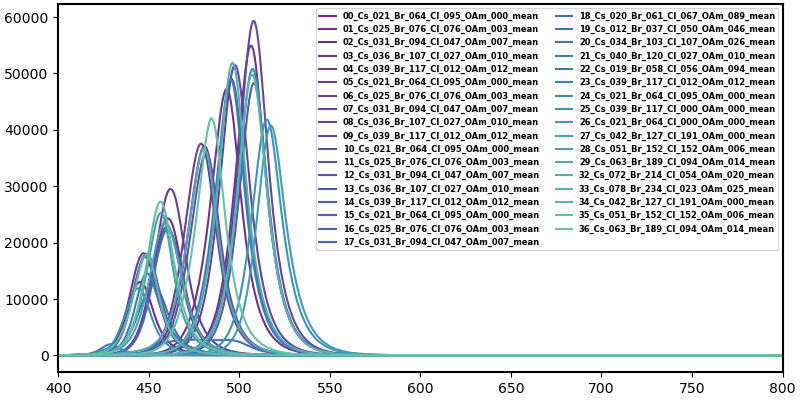

In [19]:
f1, ax1 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title01
k = len(title01)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
# id0 = 8
# id1 = 23
cmap = BlGn

for i in range(len(title01)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    # t = re.findall(r'\d+', title[i])[-1]
    ax1.plot(df01[keys_list01[i*2]], df01[keys_list01[i*2+1]], color=cmap(color_idx[i]), label=label[i])
        
legend_properties = {'weight':'bold', 'size':6}    
# ax1.legend(prop=legend_properties, loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
ax1.legend(prop=legend_properties, ncol=2)

ax1.set_xlim(400, 800)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

# wavelength_range = [390, 750]
# idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
# idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

# ax1.axvline(w0)
# ax1.axvline(w1)

## Prepare keys for Abs scans in pd dataframe

In [20]:
keys_list02 = list(df02.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list02

['x_00_Cs_021_Br_064_Cl_095_OAm_000',
 '00_Cs_021_Br_064_Cl_095_OAm_000_mean',
 'x_01_Cs_025_Br_076_Cl_076_OAm_003',
 '01_Cs_025_Br_076_Cl_076_OAm_003_mean',
 'x_02_Cs_031_Br_094_Cl_047_OAm_007',
 '02_Cs_031_Br_094_Cl_047_OAm_007_mean',
 'x_03_Cs_036_Br_107_Cl_027_OAm_010',
 '03_Cs_036_Br_107_Cl_027_OAm_010_mean',
 'x_04_Cs_039_Br_117_Cl_012_OAm_012',
 '04_Cs_039_Br_117_Cl_012_OAm_012_mean',
 'x_05_Cs_021_Br_064_Cl_095_OAm_000',
 '05_Cs_021_Br_064_Cl_095_OAm_000_mean',
 'x_06_Cs_025_Br_076_Cl_076_OAm_003',
 '06_Cs_025_Br_076_Cl_076_OAm_003_mean',
 'x_07_Cs_031_Br_094_Cl_047_OAm_007',
 '07_Cs_031_Br_094_Cl_047_OAm_007_mean',
 'x_08_Cs_036_Br_107_Cl_027_OAm_010',
 '08_Cs_036_Br_107_Cl_027_OAm_010_mean',
 'x_09_Cs_039_Br_117_Cl_012_OAm_012',
 '09_Cs_039_Br_117_Cl_012_OAm_012_mean',
 'x_10_Cs_021_Br_064_Cl_095_OAm_000',
 '10_Cs_021_Br_064_Cl_095_OAm_000_mean',
 'x_11_Cs_025_Br_076_Cl_076_OAm_003',
 '11_Cs_025_Br_076_Cl_076_OAm_003_mean',
 'x_12_Cs_031_Br_094_Cl_047_OAm_007',
 '12_Cs_031_Br

In [21]:
# title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
title02 = keys_list02[1::2]
print(*title02, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

00_Cs_021_Br_064_Cl_095_OAm_000_mean
01_Cs_025_Br_076_Cl_076_OAm_003_mean
02_Cs_031_Br_094_Cl_047_OAm_007_mean
03_Cs_036_Br_107_Cl_027_OAm_010_mean
04_Cs_039_Br_117_Cl_012_OAm_012_mean
05_Cs_021_Br_064_Cl_095_OAm_000_mean
06_Cs_025_Br_076_Cl_076_OAm_003_mean
07_Cs_031_Br_094_Cl_047_OAm_007_mean
08_Cs_036_Br_107_Cl_027_OAm_010_mean
09_Cs_039_Br_117_Cl_012_OAm_012_mean
10_Cs_021_Br_064_Cl_095_OAm_000_mean
11_Cs_025_Br_076_Cl_076_OAm_003_mean
12_Cs_031_Br_094_Cl_047_OAm_007_mean
13_Cs_036_Br_107_Cl_027_OAm_010_mean
14_Cs_039_Br_117_Cl_012_OAm_012_mean
15_Cs_021_Br_064_Cl_095_OAm_000_mean
16_Cs_025_Br_076_Cl_076_OAm_003_mean
17_Cs_031_Br_094_Cl_047_OAm_007_mean
18_Cs_020_Br_061_Cl_067_OAm_089_mean
19_Cs_012_Br_037_Cl_050_OAm_046_mean
20_Cs_034_Br_103_Cl_107_OAm_026_mean
21_Cs_040_Br_120_Cl_027_OAm_010_mean
22_Cs_019_Br_058_Cl_056_OAm_094_mean
23_Cs_039_Br_117_Cl_012_OAm_012_mean
24_Cs_021_Br_064_Cl_095_OAm_000_mean
25_Cs_039_Br_117_Cl_000_OAm_000_mean
26_Cs_021_Br_064_Cl_000_OAm_000_mean
2

## Plot all Abs scans together

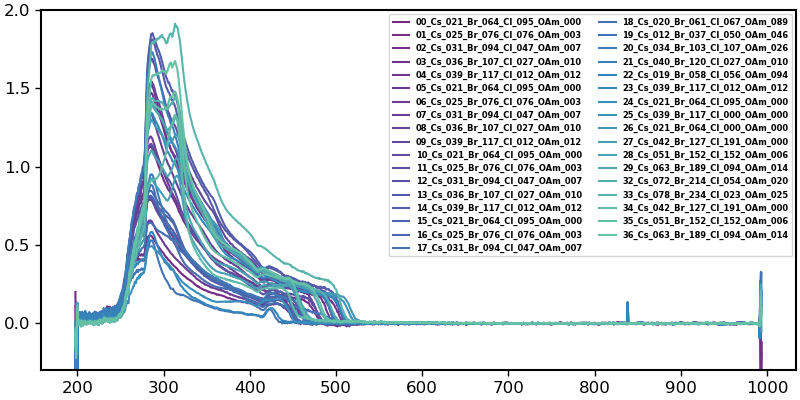

In [22]:
f2, ax2 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title02
k = len(title02)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title02)):
    # ax2.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df02[keys_list02[i*2]], df02[keys_list02[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':6}    
# ax2.legend(prop=legend_properties, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
ax2.legend(prop=legend_properties, ncol=2)

# ax2.set_xlim(-0.3, 1)
ax2.set_ylim(-0.3, 2.0)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

# Read Peak, FWHM, PLQY from json log

## Check unexported scans

In [23]:
for i in range(len(subfolder01)):
# for i in range(len(dilute_list)):
    data_files = glob.glob(subfolder01[i] + '/**.csv')
    data_files.sort()
    suffix = f'{i:02d}_' + os.path.basename(data_files[0])[:28]
    # print(f'{i = }, {suffix = }')


    if 'Cs' in suffix:
        if 'fitted' in data_files[-1]:             
            # print('Read data from **fitted.csv')
            pass
        
        else:
            print(f'{i = }, {suffix = }')
            print('No **fitted.csv')

    else:
        print(f'{i = }, {suffix = }')
        print('Other data (bkg or test)')


i = 0, suffix = '00_Cs_021_Br_064_Cl_095_OAm_000'
No **fitted.csv
i = 21, suffix = '21_Cs_040_Br_120_Cl_027_OAm_010'
No **fitted.csv
i = 30, suffix = '30_test_config_20240914-230838_'
Other data (bkg or test)
i = 31, suffix = '31_test_config_20240914-231043_'
Other data (bkg or test)
i = 37, suffix = '37_Tol_OA_bkg_flow_10min_02_202'
Other data (bkg or test)
i = 38, suffix = '38_Tol_OA_bkg_flow_10min_02_202'
Other data (bkg or test)


In [24]:
# cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd02 = '/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/json_log'
subfolder03 = glob.glob(cwd02 + '/**.json')
subfolder03.sort()
# # del subfolder[-1]
print(*subfolder03, sep = '\n')  ## Print one element per line

/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/json_log/20240913-232855_e22dc67e.json
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/json_log/20240913-235652_b42a3ca6.json
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/json_log/20240914-014420_b857c5a0.json
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/json_log/20240914-021112_428cc341.json
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/json_log/20240914-024023_dbd2f7b6.json
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/json_log/20240914-030902_b61aced3.json
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/json_log/20240914-033640_786366d4.json
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/json_log/20240914-040349_66f09641.json
/Volumes/CHL_SBU/LDRD_MAC_168223/20240920_xpd_ws3_backup/20240913_v2_Cl/json_log/20240914-043041_f5991a0d.json
/

In [25]:
len(subfolder03)

35

In [26]:
len('20240915-024150_')

16

In [27]:
json_uid_list = []
for i in range(len(subfolder03)):
    uid = os.path.basename(subfolder03[i])[16:24]
    json_uid_list.append(uid)

In [28]:
count = 0
for i in range(len(subfolder01)):
# for i in range(len(dilute_list)):
    data_files = glob.glob(subfolder01[i] + '/**.csv')
    data_files.sort()
    suffix = f'{i:02d}_' + os.path.basename(data_files[0])[:28]
    # print(f'{i = }, {suffix = }')


    if 'Cs' in suffix:
        if 'fitted' in data_files[-1]:
            uid = os.path.basename(subfolder01[i])[15:23]
            if uid in json_uid_list:
                print(f'{i = }, {uid = }, in json_uid_list')
                count += 1
            else:
                print(f'\n\n{i = }, {uid = }, NOT in json_uid_list\n\n')


i = 1, uid = 'e22dc67e', in json_uid_list
i = 2, uid = 'b42a3ca6', in json_uid_list
i = 3, uid = 'b857c5a0', in json_uid_list
i = 4, uid = '428cc341', in json_uid_list
i = 5, uid = 'dbd2f7b6', in json_uid_list
i = 6, uid = 'b61aced3', in json_uid_list
i = 7, uid = '786366d4', in json_uid_list
i = 8, uid = '66f09641', in json_uid_list
i = 9, uid = 'f5991a0d', in json_uid_list
i = 10, uid = '6f7dbc0b', in json_uid_list
i = 11, uid = 'f7861d48', in json_uid_list
i = 12, uid = '74bfca03', in json_uid_list
i = 13, uid = '9b60aceb', in json_uid_list
i = 14, uid = 'cc13bc95', in json_uid_list
i = 15, uid = 'f05f0a2b', in json_uid_list
i = 16, uid = 'c0012a44', in json_uid_list
i = 17, uid = 'a67bd8b2', in json_uid_list
i = 18, uid = '8363eb1b', in json_uid_list


i = 19, uid = 'a331e6ba', NOT in json_uid_list




i = 20, uid = '57583c28', NOT in json_uid_list


i = 22, uid = '56259565', in json_uid_list
i = 23, uid = 'b56531c2', in json_uid_list
i = 24, uid = '8c8ab4b7', in json_uid_list
i = 

In [29]:
count

31

## Read json in json_log as dic

In [30]:
import json
# for i in range(len(subfolder03)):
with open(subfolder03[0], 'r') as f:
    content = f.read().split('}{')[0] + '}'
    data_dict = json.loads(content)

In [31]:
data_dict.keys()

dict_keys(['uid', 'uid_catalog', 'uid_bundle', 'uid_pdfstream', 'uid_sandbox', 'metadata_dic', 'pdf_property', 'optical_property', 'agent_data', 'continue_iteration', 'finished'])

In [32]:
data_dict['uid']

'e22dc67e-ac74-4d0a-9f29-06a51aadf662'

In [33]:
data_dict['optical_property']

{'PL_integral': 713761.939177489,
 'Absorbance_365': 0.2564784190934481,
 'Peak': 460.4579446704058,
 'FWHM': 20.82574990606081,
 'PLQY': 0.7304478050348958}

In [34]:
data_dict['metadata_dic'].keys()

dict_keys(['uid', 'time', 'pumps', 'precursors', 'infuse_rate', 'infuse_rate_unit', 'pump_status', 'mixer', 'sample_type', 'note', 'stream_name', 'r_2'])

In [35]:
data_dict['metadata_dic']['infuse_rate']

[25.31, 75.93, 75.93, 2.83, 20.0, 900.0]

In [36]:
data_dict['metadata_dic']['precursors']

['CsPb(oleate)3_30mM_20240802',
 'TOABr_100mM_20240828',
 'ZnCl2_60mM_20240731',
 'OAm_Tol',
 'PF_oil',
 'Toluene']

In [37]:
data_dict['metadata_dic']['pump_status']

['Infusing', 'Infusing', 'Infusing', 'Infusing', 'Infusing', 'Infusing']

In [38]:
data_dict['metadata_dic']['sample_type']

'Cs_025_Br_076_Cl_076_OAm_003_PF_020_Tol_900'

In [39]:
list_01 = []
for i in range(len(subfolder03)):
    
    with open(subfolder03[i], 'r') as f:
        content = f.read().split('}{')[0] + '}'
        data_dict = json.loads(content)
        rates_uvvis = []
        k = 0
        for status in data_dict['metadata_dic']['pump_status'][0:4]:
            if status == 'Infusing':
                rates_uvvis.append(data_dict['metadata_dic']['infuse_rate'][k])
            else:
                rates_uvvis.append(data_dict['metadata_dic']['infuse_rate'][k]*0)
            k += 1
        
        rates_uvvis.append(data_dict['optical_property']['Peak'])
        rates_uvvis.append(data_dict['optical_property']['FWHM'])
        rates_uvvis.append(data_dict['optical_property']['PLQY'])

        rates_uvvis.append(data_dict['uid'])
        rates_uvvis.append(data_dict['metadata_dic']['sample_type'])
    
    list_01.append(rates_uvvis)

In [40]:
len(list_01)

35

In [41]:
len(list_01[0])

9

In [42]:
fout = cwd01 + '/data_from_json_log.csv'

In [43]:
# with open(fout, 'w') as fp:
#     fp.write('CsPb,TOABr,ZnCl2,OAm_Tol,Peak,FWHM,PLQY,uid,sample_type\n')
    
#     for i in range(len(list_01)):
#         fp.write(f'{list_01[i][0]},{list_01[i][1]},{list_01[i][2]},{list_01[i][3]},{list_01[i][4]},{list_01[i][5]},{list_01[i][6]},{list_01[i][7]},{list_01[i][8]}\n')
